In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.ticker as mticker
import locale

In [20]:
# Configuração do locale para formatação numérica
try:
    locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')
except locale.Error:
    print("Locale 'pt_BR.UTF-8' não encontrado. Tentando 'pt_BR'.")
    try:
        locale.setlocale(locale.LC_NUMERIC, 'pt_BR')
    except locale.Error:
        print("Locale 'pt_BR' também não encontrado. Usando locale padrão do sistema.")
        locale.setlocale(locale.LC_NUMERIC, '')

In [3]:
y = {'Ano':[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
     'EaD':[930920, 993062, 1113958, 1153640, 1341876, 1393780, 1494427, 1759250, 2056559, 2450265, 3105803, 3716370, 4330934, 4913281],
    'Presencial':[5476813, 5772478, 5944126, 6169324, 6497889, 6639794, 6557827, 6531661, 6395189, 6154261, 5575142, 5270750, 5113182, 5063936]}

In [3]:
df_mat = pd.DataFrame(y)

In [4]:
df_melted = df_mat.melt('Ano', var_name='Modalidade', value_name='Matriculas')

In [5]:
df_mat['dif_percentual'] = np.where(
    df_mat['Presencial'] != 0,
    ((df_mat['EaD'] - df_mat['Presencial']) / df_mat['Presencial']) * 100,
    np.nan
)

In [9]:
df_mat['Total'] = df_mat['EaD'] + df_mat['Presencial']

In [87]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             14 non-null     int64  
 1   EaD             14 non-null     int64  
 2   Presencial      14 non-null     int64  
 3   dif_percentual  14 non-null     float64
 4   Total           14 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 692.0 bytes


sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Ano",
    y="Matriculas",
    hue="Modalidade",
    data=df_melted,
    palette={"EaD": "#0072B2", "Presencial": "#D55E00"}, # Cores personalizadas
    errorbar=None # Não queremos barras de erro para este tipo de visualização
)

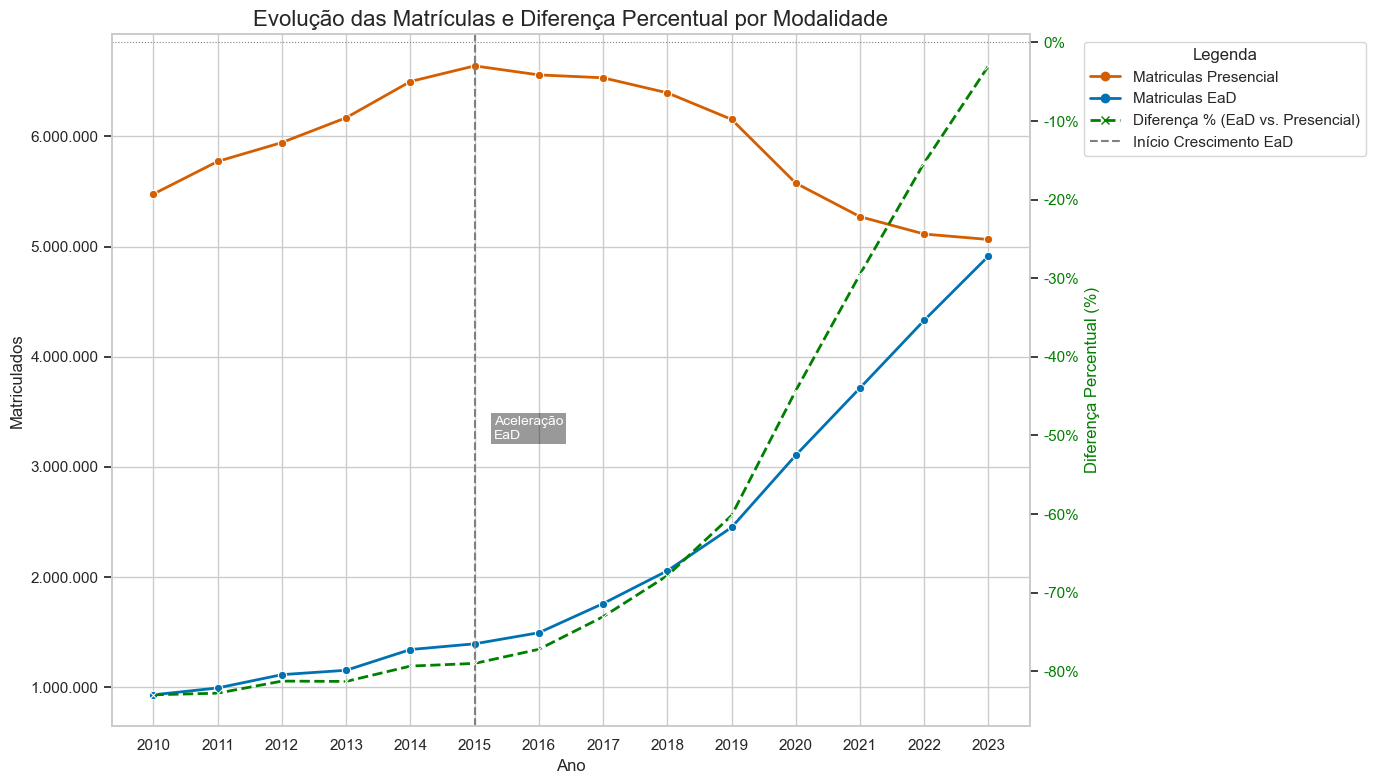

In [116]:
# 1. configuração do estilo
sns.set_theme(style="whitegrid")
# 2. Criando a figura e os eixos
# Crindo dois eixos y que compartilham o mesmo eixo x
fig, ax1 = plt.subplots(figsize=(14, 8)) # ax1 será para o ingressantes
# Criando o segundo eixo y, "gêmio" do primeiro (compartilhando o eixo x)
ax2 = ax1.twinx() # ax2 será para a diferença percentual.

#---Plotando da linhas no primeiro eixo (Ingressantes)---
# Linha para presencial
sns.lineplot(
    x= 'Ano',
    y= 'Presencial',
    data = df_mat,
    ax =ax1,
    color='#D55E00',
    #label='Ingressantes Presencial',
    linewidth=2,
    marker='o'
)

# Linha para o EaD

sns.lineplot(
    x='Ano',
    y='EaD',
    data = df_mat,
    ax = ax1,
    color = '#0072B2',
    #label = 'Ingressantes EaD',
    linewidth=2,
    marker='o'
)

#---Plotando a linha do diferencial percentual no segundo Eixo---
sns.lineplot(
    x='Ano',
    y= 'dif_percentual',
    data= df_mat,
    ax=ax2,
    color= 'green',
    label= 'Diferença % (EaD vs. Presencil)',
    linewidth=2,
    linestyle='--',
    marker='x'
)

ax1.set_title('Evolução das Matrículas e Diferença Percentual por Modalidade', fontsize=16)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Matriculados', fontsize=12)
ax2.set_ylabel('Diferença Percentual (%)', fontsize=12, color='green') # Rótulo do eixo 2

# Ajustar a cor dos ticks do eixo 2 para combinar com a linha
ax2.tick_params(axis='y', labelcolor='green')
ax2.grid(False)

# --- Formatação dos Ticks (Eixo Y para Ingressantes) ---
ax1.ticklabel_format(style='plain', axis='y')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

# --- Formatação dos Ticks (Eixo Y para Porcentagem) ---
# Formatar como porcentagem com 0 casas decimais
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# --- Adicionando uma Linha de Referência em 0% no Eixo da Diferença ---
ax2.axhline(0, color='gray', linestyle=':', linewidth=0.8, label='Ponto de Equilíbrio (0% Diferença)')

# --- Destacando o Crescimento a partir de 2015 ---
# Linha vertical
ax1.axvline(x=2015, color='gray', linestyle='--', linewidth=1.5, label='Início Crescimento EaD')
# Adicionando texto de anotação
ax1.text(2015.3, ax1.get_ylim()[1] * 0.5, 'Aceleração\nEaD',
         color='white', ha='left', va='top', fontsize=10, bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=2))


custom_lines = [
    Line2D([0], [0], color='#D55E00', lw=2, marker='o'), # Para Presencial
    Line2D([0], [0], color='#0072B2', lw=2, marker='o'), # Para EaD
    Line2D([0], [0], color='green', lw=2, linestyle='--', marker='x'), # Para Diferença %
    Line2D([0], [0], color='gray', lw=1.5, linestyle='--') # Para Linha 2015
]
custom_labels = [
    'Matriculas Presencial',
    'Matriculas EaD',
    'Diferença % (EaD vs. Presencial)',
    'Início Crescimento EaD'
]
ax2.legend(custom_lines, custom_labels, title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')


# --- Ajustes finais de layout e salvamento ---
plt.xticks(df_mat['Ano'], rotation=45) # Exibe todos os anos e rotaciona
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.savefig('evolucao_e_diferenca_percentual_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
for i, ano in enumerate(df_mat['Ano']):
    # Acessar os valores de EaD e Presencial para o ano atual
    ead_val = df_mat.loc[df_mat['Ano'] == ano, 'EaD'].iloc[0]
    presencial_val = df_mat.loc[df_mat['Ano'] == ano, 'Presencial'].iloc[0]

<Figure size 640x480 with 0 Axes>

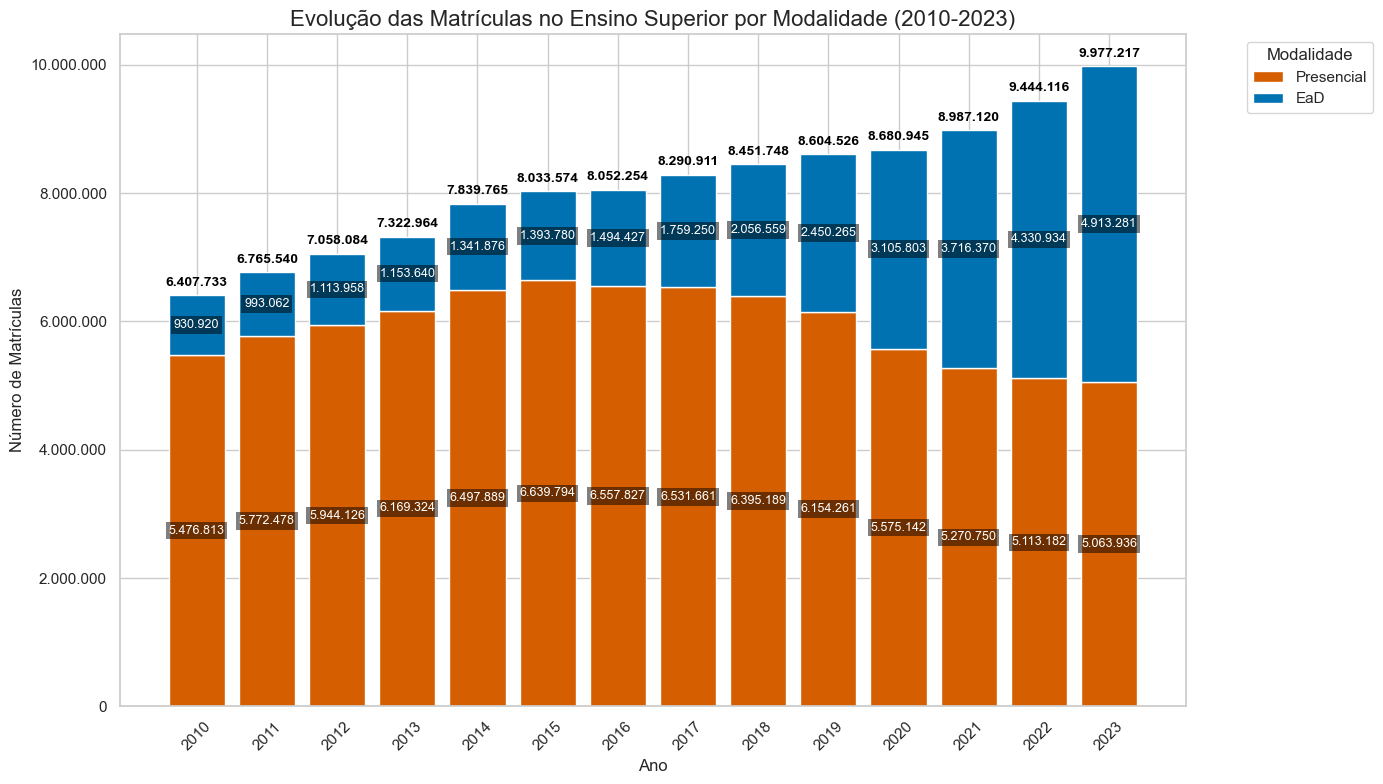

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(14, 8))
bars_presencial = ax.bar(df_mat['Ano'].astype(str), df_mat['Presencial'],
                             color='#D55E00', label='Presencial')
bars_ead = ax.bar(df_mat['Ano'].astype(str), df_mat['EaD'],
                       bottom=df_mat['Presencial'],
                       color='#0072B2', label='EaD')
for j, (p_val, e_val) in enumerate(zip(df_mat['Presencial'], df_mat['EaD'])):
        # Texto para Presencial
        # Posição y centralizada na barra Presencial
        y_center_presencial = p_val / 2
        ax.text(j, y_center_presencial, f'{p_val:,.0f}'.replace(',', '.'),
                ha='center', va='center', color='white', fontsize=9,
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))


        y_center_ead = p_val + (e_val / 2)
        ax.text(j, y_center_ead, f'{e_val:,.0f}'.replace(',', '.'),
                ha='center', va='center', color='white', fontsize=9,
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

for j, total_val in enumerate(df_mat['Total']):
    # A posição Y será o valor total da barra mais um pequeno offset para o texto não ficar colado
    offset = df_mat['Total'].max() * 0.01 # Ajuste o multiplicador (ex: 0.01 = 1% da altura máxima)
    ax.text(j, total_val + offset, f'{total_val:,.0f}'.replace(',', '.'),
            ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

ax.set_title('Evolução das Matrículas no Ensino Superior por Modalidade (2010-2023)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Matrículas', fontsize=12)
ax.ticklabel_format(style='plain', axis='y') # Remover notação científica do eixo Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.'))) # Formatar os ticks do eixo Y

# Legenda fora do gráfico para não sobrepor
ax.legend(title='Modalidade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45) # Rotacionar os rótulos do eixo X se necessário
plt.tight_layout() # Ajustar o layout para evitar cortes
plt.savefig('Evolução_Matrículas.png', dpi=300, bbox_inches='tight')
plt.show()


Nº de Concluíntes

In [2]:
    n_ing = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
            'Presencial': [1816437, 1927778, 2214077, 2234393, 2386758, 2227841, 2143455, 2153409, 2073007, 2041460, 1756690, 1467717, 1656401, 1679790],
            'EaD': [380385, 431631, 542696, 515410, 727752, 694559, 843181, 1073497, 1373321, 1592184, 2008979, 2477374, 3100556, 3314402]}

In [3]:
df_ingressantes = pd.DataFrame(n_ing)

In [90]:
df_ingressantes['Total'] = df_ingressantes['Presencial'] + df_ingressantes['EaD']

In [91]:
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Ano         14 non-null     int64
 1   Presencial  14 non-null     int64
 2   EaD         14 non-null     int64
 3   Total       14 non-null     int64
dtypes: int64(4)
memory usage: 580.0 bytes


In [92]:
df_mel_ing = df_ingressantes.melt(id_vars=['Ano'], value_vars=['Presencial', 'EaD'], var_name='Modalidade', value_name='Ingressantes')

In [93]:
df_mel_ing

,Ano,Modalidade,Ingressantes
0,2010,Presencial,1816437
1,2011,Presencial,1927778
2,2012,Presencial,2214077
3,2013,Presencial,2234393
4,2014,Presencial,2386758
5,2015,Presencial,2227841
6,2016,Presencial,2143455
7,2017,Presencial,2153409
8,2018,Presencial,2073007
9,2019,Presencial,2041460


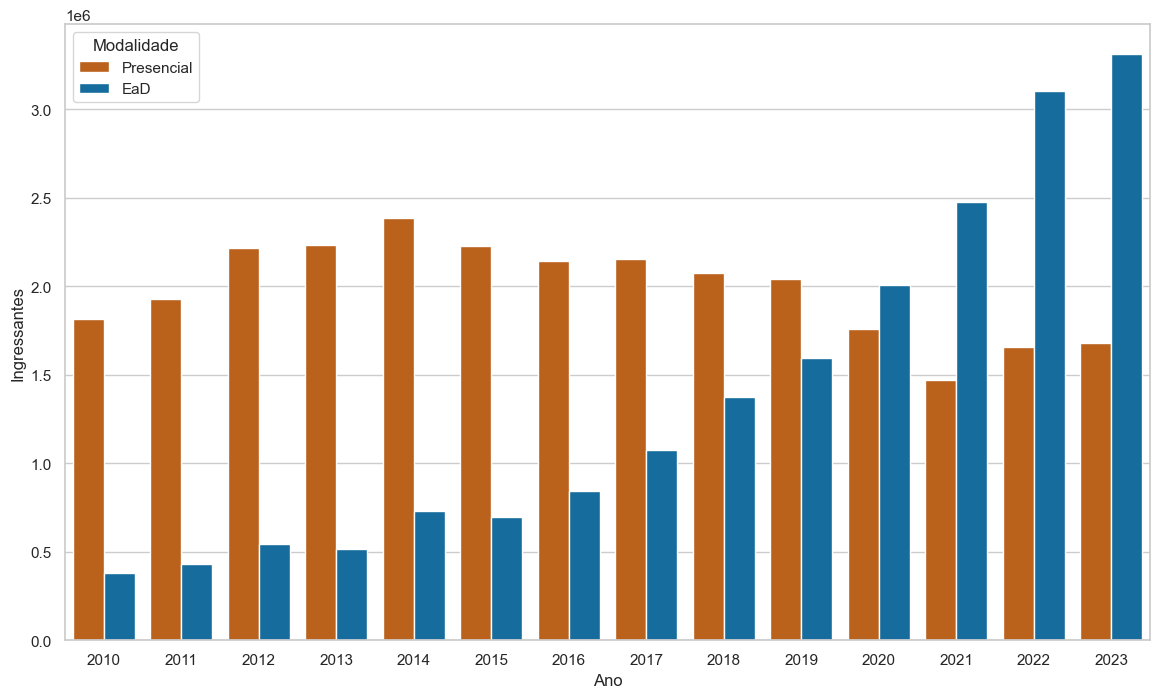

In [94]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,8))
ax = sns.barplot(
    x="Ano",
    y="Ingressantes",
    hue="Modalidade",
    data=df_mel_ing,
    palette={"EaD": "#0072B2", "Presencial": "#D55E00"},
    errorbar=None    
)

In [95]:
for i, ano in enumerate(df_ingressantes['Ano']):
    ead_val_ing = df_ingressantes.loc[df_ingressantes['Ano'] == ano, 'EaD'].iloc[0]
    presencial_val = df_ingressantes.loc[df_ingressantes['Ano'] == ano, 'Presencial'].iloc[0]

<Figure size 640x480 with 0 Axes>

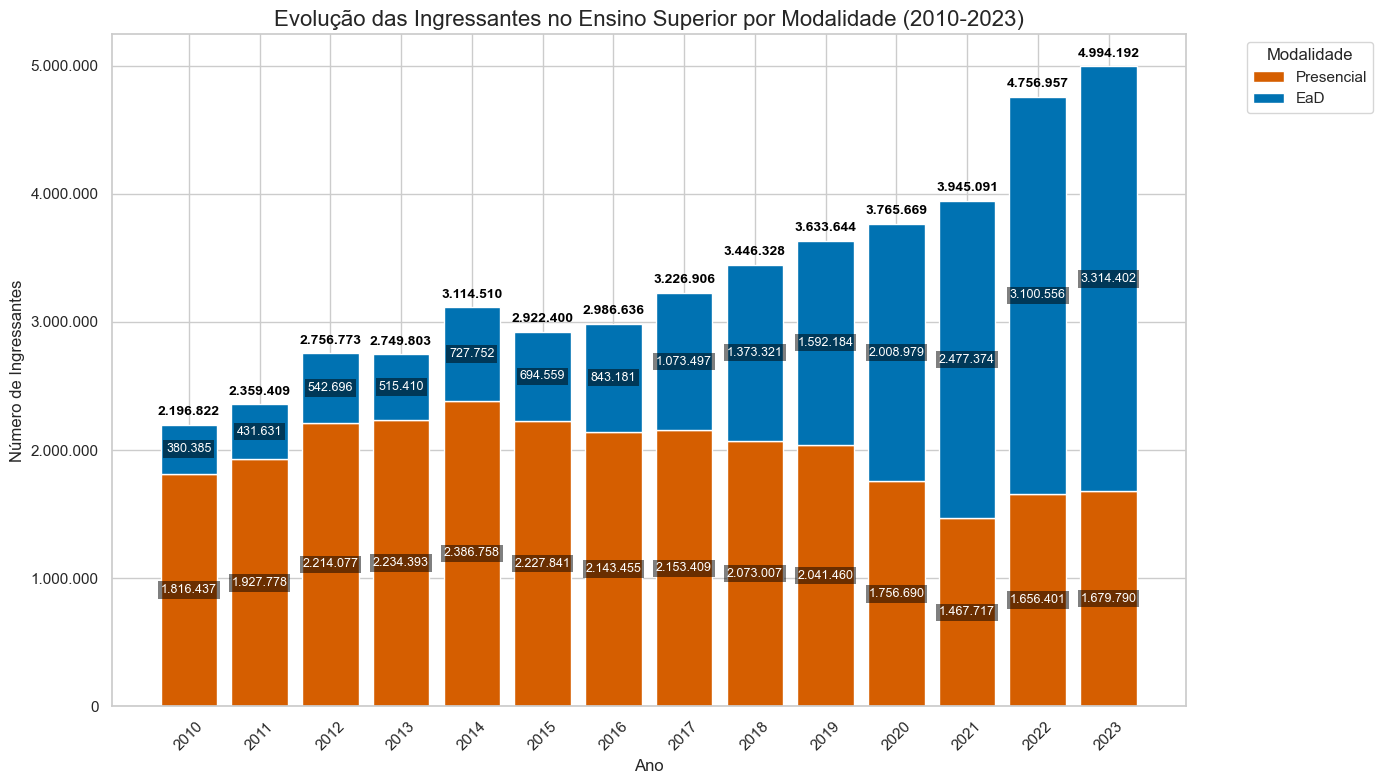

In [96]:
plt.clf()
fig, ax = plt.subplots(figsize=(14, 8))
bars_presencial = ax.bar(df_ingressantes['Ano'].astype(str), df_ingressantes['Presencial'],
                             color='#D55E00', label='Presencial')
bars_ead = ax.bar(df_ingressantes['Ano'].astype(str), df_ingressantes['EaD'],
                       bottom=df_ingressantes['Presencial'],
                       color='#0072B2', label='EaD')
for j, (p_val, e_val) in enumerate(zip(df_ingressantes['Presencial'], df_ingressantes['EaD'])):
        y_center_presencial = p_val / 2
        ax.text(j, y_center_presencial, f'{p_val:,.0f}'.replace(',', '.'),
                ha='center', va='center', color='white', fontsize=9,
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

        y_center_ead = p_val + (e_val / 2)
        ax.text(j, y_center_ead, f'{e_val:,.0f}'.replace(',', '.'),
                ha='center', va='center', color='white', fontsize=9,
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

for j, total_val in enumerate(df_ingressantes['Total']):
    offset = df_ingressantes['Total'].max() * 0.01 # Ajuste o multiplicador (ex: 0.01 = 1% da altura máxima)
    ax.text(j, total_val + offset, f'{total_val:,.0f}'.replace(',', '.'),
            ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

ax.set_title('Evolução das Ingressantes no Ensino Superior por Modalidade (2010-2023)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Ingressantes', fontsize=12)
ax.ticklabel_format(style='plain', axis='y') # Remover notação científica do eixo Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.'))) # Formatar os ticks do eixo Y

ax.legend(title='Modalidade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45) # Rotacionar os rótulos do eixo X se necessário
plt.tight_layout() # Ajustar o layout para evitar cortes
plt.savefig('Figura_6_Evolução_Ingressantes.png', dpi=300, bbox_inches='tight')
plt.show()



In [97]:
df_ingressantes['dif_percental'] = np.where(
    df_ingressantes['Presencial'] != 0,
    ((df_ingressantes['EaD'] - df_ingressantes['Presencial']) / df_ingressantes['Presencial']) * 100,
    np.nan # Se presencial for 0, o resultado será (not a number)
)

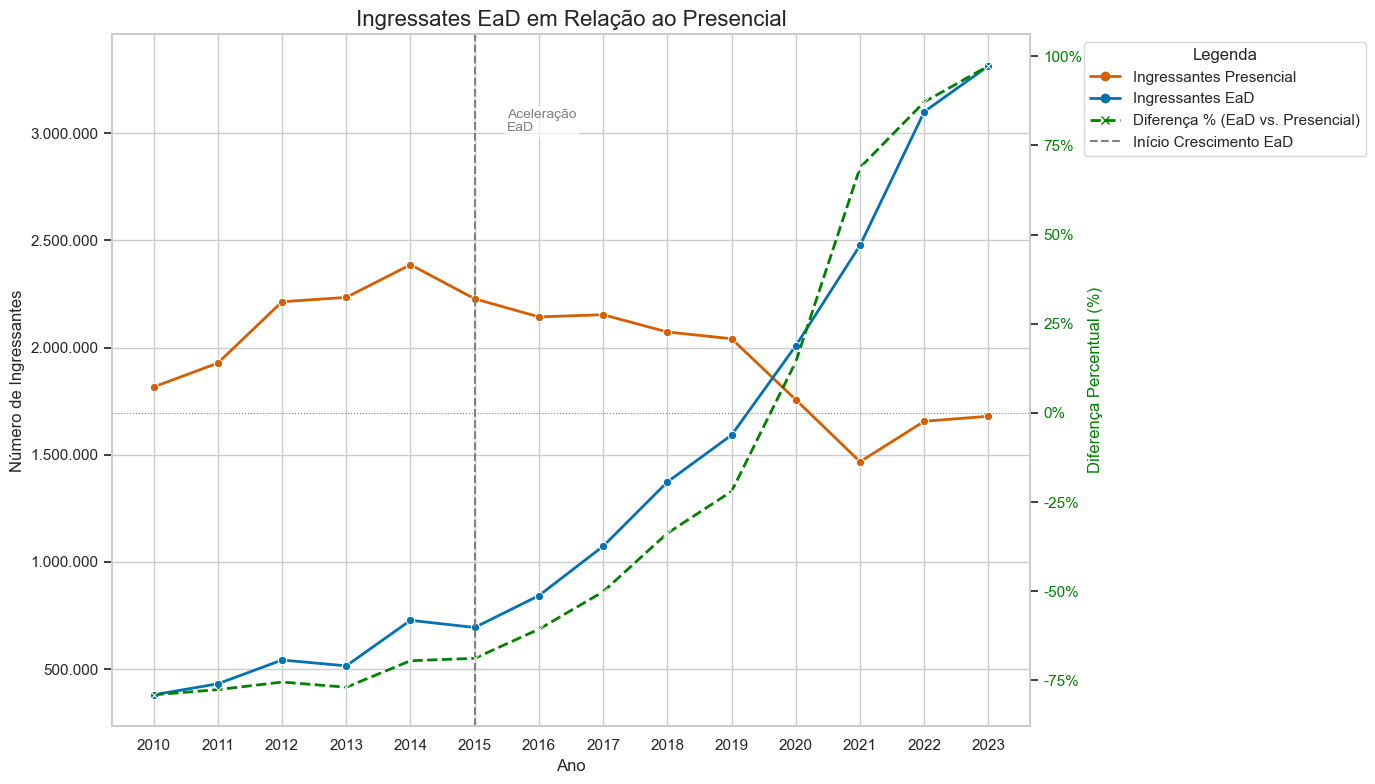

In [98]:
# 1. configuração do estilo
sns.set_theme(style="whitegrid")
# 2. Criando a figura e os eixos
# Crindo dois eixos y que compartilham o mesmo eixo x
fig, ax1 = plt.subplots(figsize=(14, 8)) # ax1 será para o ingressantes
# Criando o segundo eixo y, "gêmio" do primeiro (compartilhando o eixo x)
ax2 = ax1.twinx() # ax2 será para a diferença percentual.

#---Plotando da linhas no primeiro eixo (Ingressantes)---
# Linha para presencial
sns.lineplot(
    x= 'Ano',
    y= 'Presencial',
    data = df_ingressantes,
    ax =ax1,
    color='#D55E00',
    #label='Ingressantes Presencial',
    linewidth=2,
    marker='o'
)

# Linha para o EaD

sns.lineplot(
    x='Ano',
    y='EaD',
    data = df_ingressantes,
    ax = ax1,
    color = '#0072B2',
    #label = 'Ingressantes EaD',
    linewidth=2,
    marker='o'
)

#---Plotando a linha do diferencial percentual no segundo Eixo---
sns.lineplot(
    x='Ano',
    y= 'dif_percental',
    data= df_ingressantes,
    ax=ax2,
    color= 'green',
    label= 'Diferença % (EaD vs. Presencil)',
    linewidth=2,
    linestyle='--',
    marker='x'
)

ax1.set_title('Ingressates EaD em Relação ao Presencial', fontsize=16)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Número de Ingressantes', fontsize=12)
ax2.set_ylabel('Diferença Percentual (%)', fontsize=12, color='green') # Rótulo do eixo 2

# Ajustar a cor dos ticks do eixo 2 para combinar com a linha
ax2.tick_params(axis='y', labelcolor='green')
ax2.grid(False)

# --- Formatação dos Ticks (Eixo Y para Ingressantes) ---
ax1.ticklabel_format(style='plain', axis='y')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

# --- Formatação dos Ticks (Eixo Y para Porcentagem) ---
# Formatar como porcentagem com 0 casas decimais
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# --- Adicionando uma Linha de Referência em 0% no Eixo da Diferença ---
ax2.axhline(0, color='gray', linestyle=':', linewidth=0.8, label='Ponto de Equilíbrio (0% Diferença)')

# --- Destacando o Crescimento a partir de 2015 ---
# Linha vertical

ax1.axvline(x=2015, color='gray', linestyle='--', linewidth=1.5, label='Início Crescimento EaD')

# Adicionando texto de anotação
ax1.text(2015.5, ax1.get_ylim()[1] * 0.9, 'Aceleração\nEaD',
         color='gray', ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))


custom_lines = [
    Line2D([0], [0], color='#D55E00', lw=2, marker='o'), # Para Presencial
    Line2D([0], [0], color='#0072B2', lw=2, marker='o'), # Para EaD
    Line2D([0], [0], color='green', lw=2, linestyle='--', marker='x'), # Para Diferença %
    Line2D([0], [0], color='gray', lw=1.5, linestyle='--') # Para Linha 2015
]
custom_labels = [
    'Ingressantes Presencial',
    'Ingressantes EaD',
    'Diferença % (EaD vs. Presencial)',
    'Início Crescimento EaD'
]
ax2.legend(custom_lines, custom_labels, title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')


# --- Ajustes finais de layout e salvamento ---
plt.xticks(df_ingressantes['Ano'], rotation=45) # Exibe todos os anos e rotaciona
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.savefig('evolucao_e_diferenca_percentual.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
ing_cad = {
    'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Pres_pr': [1380653, 1470985, 1714507, 1739234, 1881923, 1723604, 1638293, 1650614, 1554594, 1514506, 1277865, 1017878, 1198819, 1198092],
    'EaD_pr': [340211, 397586, 494169, 478504, 683837, 664236, 818691, 986532, 1310678, 1559725, 1960679,2434952, 3032618, 3226891],
    'Pres_pu': [435784, 456793, 499570, 495159, 504835, 504237, 505162, 502795, 518413, 526954, 478825, 449839, 457582, 481698],
    'EaD_pu': [40174, 34045, 48527, 36906, 43915, 30323, 24490, 86965, 62643, 32459, 48300, 42422, 67938, 87511]
}

In [3]:
df_i_cad = pd.DataFrame(ing_cad)

In [4]:
df_i_cad.columns

Index(['Ano', 'Pres_pr', 'EaD_pr', 'Pres_pu', 'EaD_pu'], dtype='object')

In [5]:
df_i_cad['Total_Geral_Ano'] = df_i_cad['Pres_pr'] + df_i_cad['EaD_pr'] + df_i_cad['EaD_pu'] + df_i_cad['Pres_pu']

In [6]:
df_i_cad['Total_EaD'] = df_i_cad['EaD_pr'] + df_i_cad['EaD_pu']

In [7]:
df_i_cad['Pres_pr_perc'] = (df_i_cad['Pres_pr'] /df_i_cad['Total_Geral_Ano']) * 100
df_i_cad['EaD_pr_perc'] = (df_i_cad['EaD_pr'] / df_i_cad['Total_Geral_Ano']) * 100
df_i_cad['Pres_pu_perc'] = (df_i_cad['Pres_pu'] / df_i_cad['Total_Geral_Ano']) * 100
df_i_cad['EaD_pu_perc'] = (df_i_cad['EaD_pu'] / df_i_cad['Total_Geral_Ano']) * 100

In [8]:
df_ilong = df_i_cad.melt(
    id_vars=['Ano'],
    value_vars=['Pres_pr', 'EaD_pr', 'Pres_pu', 'EaD_pu'],
    var_name='Tipo_Modalidade_Isnt',
    value_name='Ingressos'
)

In [9]:
df_ilong['Modalidade'] = df_ilong['Tipo_Modalidade_Isnt'].apply(lambda x: 'Presencial' if 'Pres' in x else 'EaD')

In [10]:
df_ilong['Instituicao'] = df_ilong['Tipo_Modalidade_Isnt'].apply(lambda x: 'Privada' if 'pr' in x else 'Pública')

In [13]:
#df_ilong.drop('Tipo_Modalidade_Isnt', axis=1, inplace=True)

In [14]:
sns.set_theme(style="whitegrid")

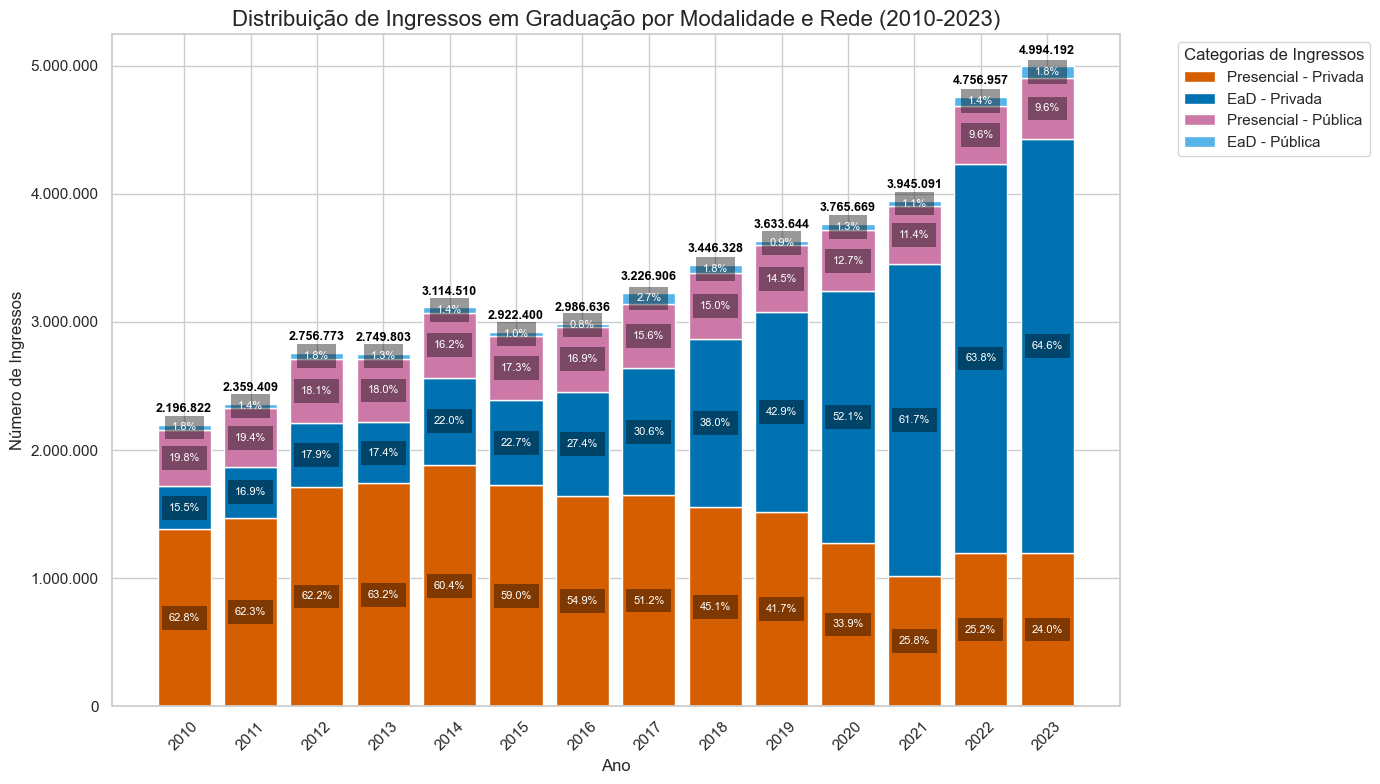

In [37]:
fig, ax = plt.subplots(figsize=(14, 8))
cores_dict = {'Presencial_Privada': '#D55E00',
             'Presencial_Publica': '#CC79A7',
             'EaD_Privada': '#0072B2',
             'EaD_Publica': '#56B4E9'}

anos = df_i_cad['Ano'].astype(str)
bottom_values = [0] * len(anos)
bars_pres_pr = ax.bar(anos, df_i_cad['Pres_pr'],
                     label= 'Presencial - Privada', color=cores_dict['Presencial_Privada'])

# Adicionando Rótulos de Porcentagem Para Pres_pr

for i, bar in enumerate(bars_pres_pr):
    height = bar.get_height()
    if height > 0: # Para evitar rótulos em barras de altura zero.
        percentage = df_i_cad['Pres_pr_perc'].iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2, # centro horizontal da barra
               bar.get_y() + height / 2, # centro vertical da barra
               f'{percentage:.1f}%', # formato 1 casa decimal e %
               ha='center', va='center', color='white', fontsize=8,
               bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=5)) # fundo para contraste

bottom_values = df_i_cad['Pres_pr']
bars_ead_pr = ax.bar(anos, df_i_cad['EaD_pr'], bottom=bottom_values,
                    label='EaD - Privada', color=cores_dict['EaD_Privada'])

for i, bar in enumerate(bars_ead_pr):
    height = bar.get_height()
    if height > 0:
        percentage = df_i_cad['EaD_pr_perc'].iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2,
               bar.get_y() + height / 2,
               f'{percentage:.1f}%',
               ha='center', va='center', color='white', fontsize=8,
               bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=5))

bottom_values = df_i_cad['Pres_pr'] + df_i_cad['EaD_pr']
bars_pres_pu = ax.bar(anos, df_i_cad['Pres_pu'], bottom=bottom_values,
                      label='Presencial - Pública', color=cores_dict['Presencial_Publica'])

for i, bar in enumerate(bars_pres_pu):
    height = bar.get_height()
    if height > 0:
        percentage = df_i_cad['Pres_pu_perc'].iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2,
               bar.get_y() + height / 2,
               f'{percentage:.1f}%',
               ha='center', va='center', color='white', fontsize=8,
               bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=5))

bottom_values = df_i_cad['Pres_pr'] + df_i_cad['EaD_pr'] + df_i_cad['Pres_pu']
bars_ead_pu = ax.bar(anos, df_i_cad['EaD_pu'], bottom=bottom_values, label='EaD - Pública', color=cores_dict['EaD_Publica'])

for i, bar in enumerate(bars_ead_pu):
    height = bar.get_height()
    if height > 0:
        percentage = df_i_cad['EaD_pu_perc'].iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{percentage:.1f}%',
                ha='center', va='center', color='white', fontsize=8,
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=5))

total_ingressos_ano = df_i_cad['Pres_pr'] + df_i_cad['EaD_pr'] + df_i_cad['Pres_pu'] + df_i_cad['EaD_pu']
for i, total_val in enumerate(total_ingressos_ano):
    offset= total_ingressos_ano.max() * 0.015
    ax.text(i, total_val + offset, f'{int(total_val):,.0f}'.replace(',', '.'),
            ha='center', va='bottom', color='black', fontsize=9, fontweight='bold')

ax.set_title('Distribuição de Ingressos em Graduação por Modalidade e Rede (2010-2023)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Ingressos', fontsize=12)

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

ax.legend(title='Categorias de Ingressos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribuição_ingressos_rede_modalidade.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
df_ilong['Categoria'] = df_ilong['Modalidade'] + '-' + df_ilong['Instituicao']

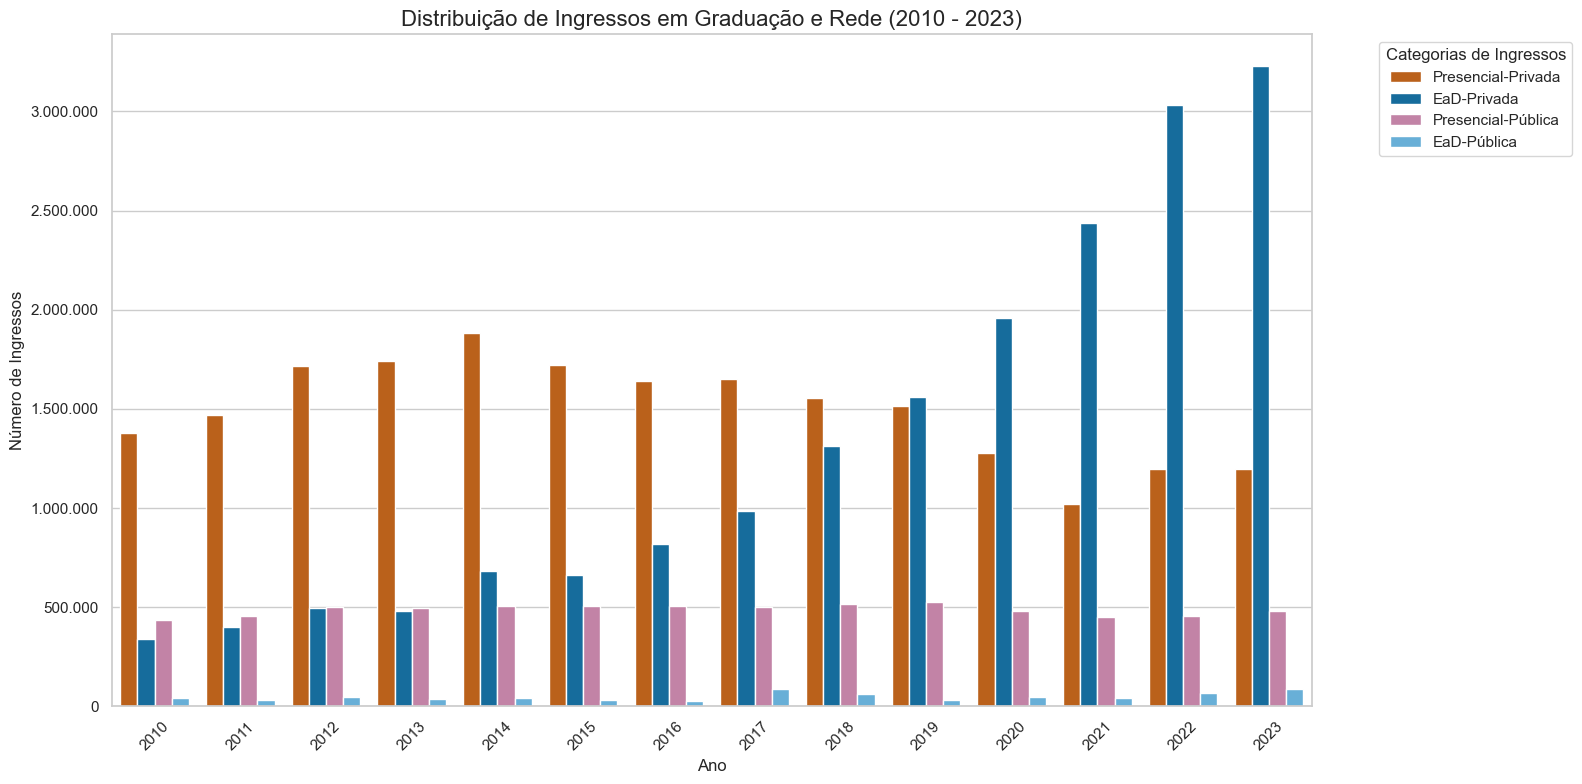

In [39]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(16, 8))

cores_agrupadas = {
    'Presencial-Privada': '#D55E00',
    'Presencial-Pública': '#CC79A7',
    'EaD-Privada': '#0072B2',
    'EaD-Pública': '#56B4E9'
}

sns.barplot(
    x='Ano',
    y='Ingressos',
    hue='Categoria',
    data=df_ilong,
    palette=cores_agrupadas,
    ax=ax,
    errorbar=None
)

#for container in ax.containers:
#    labels = [f'{int(bar.get_height()):,.0f}'.replace(',', '.') for bar in container]
#    ax.bar_label(container, label=labels, fmt='%s', fontsize=7, padding=3)

ax.set_title('Distribuição de Ingressos em Graduação e Rede (2010 - 2023)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Ingressos', fontsize=12)

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))
ax.legend(title='Categorias de Ingressos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribuição_ingressantes_agrupados_png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
df_2023 = df_i_cad[df_i_cad['Ano'] == 2023]

In [12]:
df_2023

,Ano,Pres_pr,EaD_pr,Pres_pu,EaD_pu,Total_Geral_Ano,Total_EaD,Pres_pr_perc,EaD_pr_perc,Pres_pu_perc,EaD_pu_perc
13,2023,1198092,3226891,481698,87511,4994192,3314402,23.989706,64.612874,9.645164,1.752255


In [13]:
dados_privado_2023 = [df_2023['Pres_pr'].iloc[0], df_2023['EaD_pr'].iloc[0]]
dados_publica_2023 = [df_2023['Pres_pu'].iloc[0], df_2023['EaD_pu'].iloc[0]]
total_geral_privado = df_2023['Pres_pr'].iloc[0] + df_2023['EaD_pr'].iloc[0]
total_geral_publico = df_2023['Pres_pu'].iloc[0] + df_2023['EaD_pu'].iloc[0]

In [14]:
total_geral_publico

569209

In [15]:
total_geral_privado

4424983

In [16]:
dados_privado_2023

[1198092, 3226891]

In [17]:
labels_modalidade = ['Presencial', 'EaD']
cores_modalidade = ['#D55E00', '#0072B2']

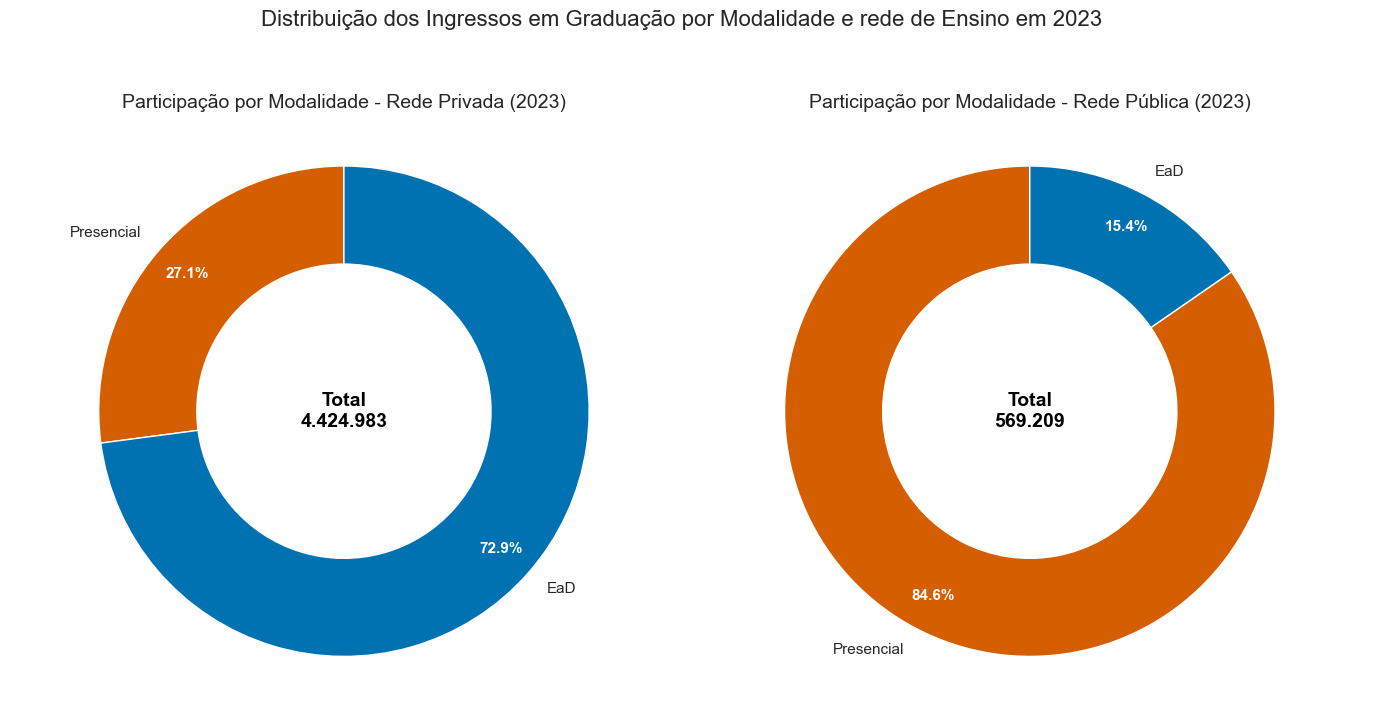

In [33]:
sns.set_theme(style="whitegrid")

fig, axes =plt.subplots(1, 2, figsize=(14, 7))

colors = sns.color_palette()

wedgts, texts, autotexts = axes[0].pie(
                           dados_privado_2023,
                           labels = labels_modalidade,
                           colors=cores_modalidade,
                           autopct='%1.1f%%',
                           startangle=90,
                           pctdistance=0.85,
                           wedgeprops=dict(width=0.4, edgecolor= 'w', linewidth=1, antialiased= True)
)

# Centralizar os Rótulos de porcentagem.
for autotext in autotexts:
    autotext.set_color('white') # Cor do texto de porcentagem
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Adicionar o número tatal de ingressos no centro do gráfico de rosca

total_ingressos_privado = f"{int(total_geral_privado):n}"
axes[0].text(0,0, f'Total\n{total_ingressos_privado}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='bold',
            color='black')

axes[0].set_title('Participação por Modalidade - Rede Privada (2023)', fontsize=14)
axes[0].axis('equal')

wedgets, texts, autotexts = axes[1].pie(
                            dados_publica_2023,
                            labels=labels_modalidade,
                            colors=cores_modalidade,
                            autopct='%1.1f%%',
                            startangle=90,
                            pctdistance=0.85,
                            wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1, antialiased=True)
)

# Centralizando os rótulos de porcentagem

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Adicionando o número tatal de ingressos no centro da rosca

total_ingressos_publico = f"{int(total_geral_publico):n}"
axes[1].text(0,0, f'Total\n{total_ingressos_publico}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='bold',
            color='black')

axes[1].set_title('Participação por Modalidade - Rede Pública (2023)', fontsize=14)
axes[1].axis('equal')

plt.suptitle('Distribuição dos Ingressos em Graduação por Modalidade e rede de Ensino em 2023', fontsize=16, y=1.02)
plt.tight_layout(rect=[0,0,1,0.98])
plt.savefig('distribuição_modalidade_rede_pizza_2023.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
docentes = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
           'EaD': [8491, 9587, 10055, 11510, 12891, 13223, 13701, 15982, 18543, 20452, 21864, 24046, 28663, 32794],
           'Presencial': [290510, 302371, 307921, 312006, 325724 , 332478, 331982, 330637, 331982, 330339, 314384, 306904, 308404, 310182]}

In [ ]:
df_docentes = pd.DataFrame(docentes)

In [ ]:
df_docentes['Total_Docentes'] = df_docentes['EaD'] + df_docentes['Presencial']

In [ ]:
df_docentes_long = df_docentes.melt(
    id_vars=['Ano'],
    value_vars=['EaD', 'Presencial'],
    var_name='Modalidade',
    value_name='Docentes'
)

In [ ]:
df_docentes_long

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14,8))

cores_modalidade = {'Presencial': '#D55E00', 'EaD': '#0072B2'}

modalidade_ordenadas = ['Presencial', 'EaD']

for i, modalidade in enumerate(modalidade_ordenadas):
    data_modalidade = df_docentes_long[df_docentes_long['Modalidade'] == modalidade].sort_values(by='Ano')
    ax.fill_between(data_modalidade['Ano'],
                   data_modalidade['Docentes'],
                   label=modalidade,
                   color=cores_modalidade[modalidade],
                   alpha=0.8
                  )
                   
for i, row in df_docentes.iterrows():
    total_val = row['Total_Docentes']
    ax.text(row['Ano'], total_val + (ax.get_ylim()[1] * 0.01),
           f'{int(total_val):,.0f}'.replace(',','.'),
           ha='center', va='bottom', color='black', fontsize=9, fontweight='bold',
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))

doc_2023 = df_docentes[df_docentes['Ano'] == 2023].iloc[0]
total_docentes_2023 = doc_2023['Total_Docentes']
perc_pres_2023 = (doc_2023['Presencial'] / total_docentes_2023) * 100
perc_ead_2023 = (doc_2023['EaD'] /total_docentes_2023) * 100

pos_pres_y = doc_2023['Presencial'] / 2
ax.text(2023, pos_pres_y, f'{perc_pres_2023:.2f}%',
        ha='center', va='center', color='black', fontsize=10, fontweight='bold')

pos_ead_y =doc_2023['Presencial'] + doc_2023['EaD'] / 2
ax.text(2023, pos_ead_y, f'{perc_ead_2023:.2f}%',
        ha='center', va='center', color='black', fontsize=10, fontweight='bold')

ax.axvline(x=2023, color='gray', linestyle='--', linewidth=1.5, label='Ano 2023')

ax.set_title('Número de Docentes por Modalidade de Ensino (2010-2023)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Docentes', fontsize=12)

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles, labels=labels, title='Modalidade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(df_docentes['Ano'], rotation=45)
plt.tight_layout()
plt.savefig('docentes_modalidade_area_empilhada.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_docentes.head()

In [ ]:
df_docentes['% EaD'] = (df_docentes['EaD'] / df_docentes['Total_Docentes']) * 100

In [ ]:
df_docentes['% Presencial'] = (df_docentes['Presencial'] / df_docentes['Total_Docentes']) * 100

In [ ]:
df_ing_ead_long = df_ning_rede.melt(
    id_vars=['Ano'],
    value_vars=['Privado', 'Publico'],
    var_name='Rede_Ensino',
    value_name='Ingressantes_EaD'
)

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))

cores_redes = {'Privado': '#56B4E9', 'Publico': '#0072B2'}

sns.lineplot(
    x='Ano',
    y='Ingressantes_EaD',
    hue='Rede_Ensino',
    data=df_ing_ead_long,
    marker='o',
    palette=cores_redes,
    ax=ax,
    linewidth=2.5
)

dados_2023_privados = df_ing_ead_long[(df_ing_ead_long['Ano'] == 2023) & (df_ing_ead_long['Rede_Ensino'] == 'Privado')]['Ingressantes_EaD'].iloc[0]
dados_2023_publica = df_ing_ead_long[(df_ing_ead_long['Ano'] == 2023) & (df_ing_ead_long['Rede_Ensino'] == 'Publico')]['Ingressantes_EaD'].iloc[0]

offset_x_privada = 0.1
offset_y_privada = 100000

ax.text(2023 + offset_x_privada, dados_2023_privados + offset_y_privada,
       f'{int(dados_2023_privados):,.0f}'.replace(',', '.'),
        ha='left', va='baseline', fontsize=10, color=cores_redes['Privado'], fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='none', lw=0, alpha=0.7))

offset_x_publica = 0.1
offset_y_publica = 100000

ax.text(2023 + offset_x_publica, dados_2023_publica + offset_y_publica,
        f'{int(dados_2023_publica):,.0f}'.replace(',', '.'),
        ha='left', va='top', fontsize=10, color=cores_redes['Publico'], fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='none', lw=0, alpha=0.7))

ax.axvline(x=2023, color='black', linestyle='--', linewidth=1.0, alpha=0.7)

#títulos
ax.set_title('Ingressantes em Cursos de Graduação a Distância por Rede de Ensino (2010-2023)', fontsize=16, pad=20)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Nº de Ingressantes EaD', fontsize=12)

# formatação eixo y
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

#configuração do eixo x para mostrar todos os anos
plt.xticks(df_ing_ead_long['Ano'].unique(), rotation=45)

#posicionar as legendas fora da área de plotagem
ax.legend(title='Rede de Ensino', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, edgecolor='black')

#ajustar o layout para todas que todos os elementos caibam na figura
plt.tight_layout()

#Salvar a imagem
plt.savefig('ingressantes_ead_por_rede_de_ensino.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
doc_2023

In [ ]:
n_ing_ead_rede = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
              'Privado': [340154, 397552, 494106, 478499, 683823, 664236, 818691, 986532, 1310678, 1559725, 1960679, 2434952, 3032618, 3226891],
              'Publico': [40174, 34045, 48527, 36906, 43915, 30323, 24490, 86965, 62643, 32459, 48300, 42422, 67938, 87511]}

In [ ]:
df_ning_rede

In [ ]:
df_ing_ead_long

(Figura 7 - Ingressantes nos cursos de graduação a distância entre 2010 e 2023 em relação ao tipo de instituição)

In [120]:
df_i_cad.columns

Index(['Ano', 'Pres_pr', 'EaD_pr', 'Pres_pu', 'EaD_pu', 'Total_Geral_Ano',
       'Total_EaD', 'Pres_pr_perc', 'EaD_pr_perc', 'Pres_pu_perc',
       'EaD_pu_perc'],
      dtype='object')

In [43]:
# Restringir a construção do gráfico apenas as colunas necessárias:
# Focar apenas nos dados interessantes criando um novo df_ead usando a função .copy para deepcopy.

df_ead = df_i_cad[['Ano', 'EaD_pr', 'EaD_pu']].copy()

In [44]:
df_ead['Total_EaD'] = df_ead['EaD_pr'] + df_ead['EaD_pu']

In [45]:
df_ead['EaD_per_perc'] = (df_ead['EaD_pr'] / df_ead['Total_EaD']) * 100

In [47]:
df_ead['EaD_pu_perc'] = (df_ead['EaD_pu'] / df_ead['Total_EaD']) * 100

In [48]:
df_ead.head()

,Ano,EaD_pr,EaD_pu,Total_EaD,EaD_per_perc,EaD_pu_perc
0,2010,340211,40174,380385,89.438595,10.561405
1,2011,397586,34045,431631,92.112476,7.887524
2,2012,494169,48527,542696,91.058161,8.941839
3,2013,478504,36906,515410,92.839487,7.160513
4,2014,683837,43915,727752,93.965664,6.034336


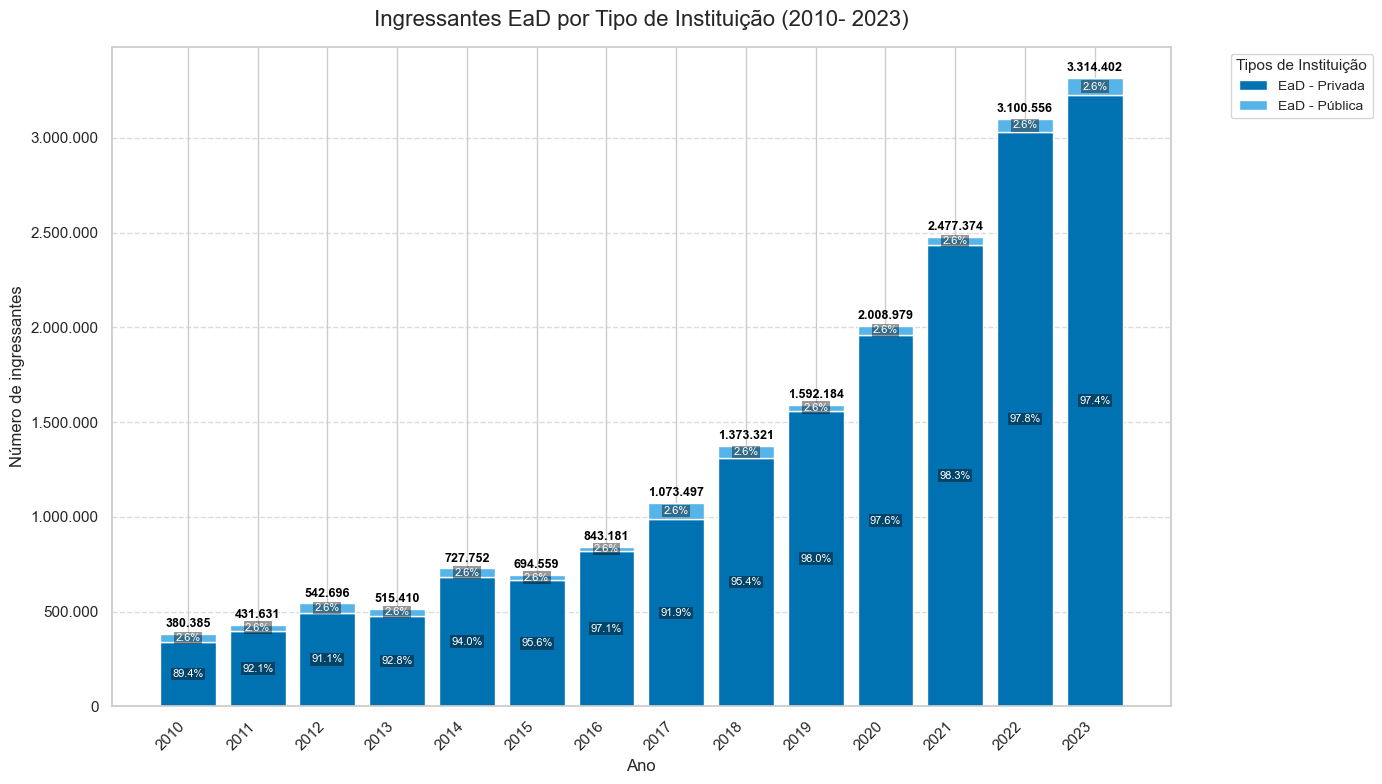

In [61]:
# Criaçõa do Gráfico de Barras Empilhadas

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")

# Convertendo ano para string no eixo X

anos_str = df_ead['Ano'].astype(str)

# Plotar a primeira camada (EaD - Privada)

bars_ead_pr = plt.bar(
    anos_str,
    df_ead['EaD_pr'],
    label='EaD - Privada',
    color='#0072B2'
)

# Plotar a segunda camada (EaD - Pública) Empilhada sobre a primeira
bars_ead_pu = plt.bar(
    anos_str,
    df_ead['EaD_pu'],
    bottom=df_ead['EaD_pr'], # Base da pilha é o valor da camada anterior
    label='EaD - Pública',
    color='#56B4E9'
)

# Adicinar rótulos (Total Absoluto e Percentual)

# Rótulo para a parte "EaD-Privada" (Base da pilha)

for i, bar in enumerate(bars_ead_pr):
    height = bar.get_height() # altura da barra
    if height > 0: # evita rótulos em barras vazias
        percentagem = df_ead['EaD_per_perc'].iloc[i]
        plt.text(bar.get_x() + bar.get_width() / 2, # centro X da barra
            bar.get_y() + height / 2, # centro Y do segmento
            f'{percentagem:.1f}%',
            ha='center', va='center', color='white', fontsize=8,
            bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))


# Rótulos para a parte "EaD - Pública" (Topo da Pilha)

for i, bar in enumerate(bars_ead_pu):
    height = bar.get_height()
    if height > 0:
        percentagem = df_ead['EaD_pu_perc'].iloc[i]
        plt.text(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{percentage:.1f}%',
                ha='center', va='center', color='white', fontsize=8,
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Rótulo para o Total Absoluto (Topo de Cada Pilha)
for i, ano_str in enumerate(anos_str):
    total_val = df_ead['Total_EaD'].iloc[i]
    # Posição Y é o topo da pilha
    plt.text(i, total_val + (plt.gca().get_ylim()[1] * 0.015), # Pequeno offset vertical
            f'{int(total_val):,.0f}'.replace(',', '.'), # formato com ponto para milhar
            ha='center', va='center', fontsize=9, fontweight='bold', color='black')

# Títulos e Rótulos
plt.title('Ingressantes EaD por Tipo de Instituição (2010- 2023)', fontsize=16, pad=15)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de ingressantes', fontsize=12)

# Configurar o ticks do eixo X para exibir todos os anos
plt.xticks(rotation=45, ha='right')

# Formatar o eixo Y nom separador de milhar (ponto)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

plt.legend(title='Tipos de Instituição', fontsize=10, bbox_to_anchor=(1.05, 1), title_fontsize=11, loc='upper left', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Figura_7_Ing_EaD_por_Cat_Adm.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# configuração do locale para formatação numérica

try:
    locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')
except locale.Error:
    print("Locale 'pt_BR.UTF-8' não encontrado. Tentando 'pt_BR'.")
    try:
        locale.setlocale(locale.LC_NUMERIC, 'pt_BR')
    except locale.Error:
        print("Locale 'pt_BR' também não encontrado. Usando locale padrão do sistema.")
        locale.setlocale(locale.LC_NUMERIC, '') # Fallback

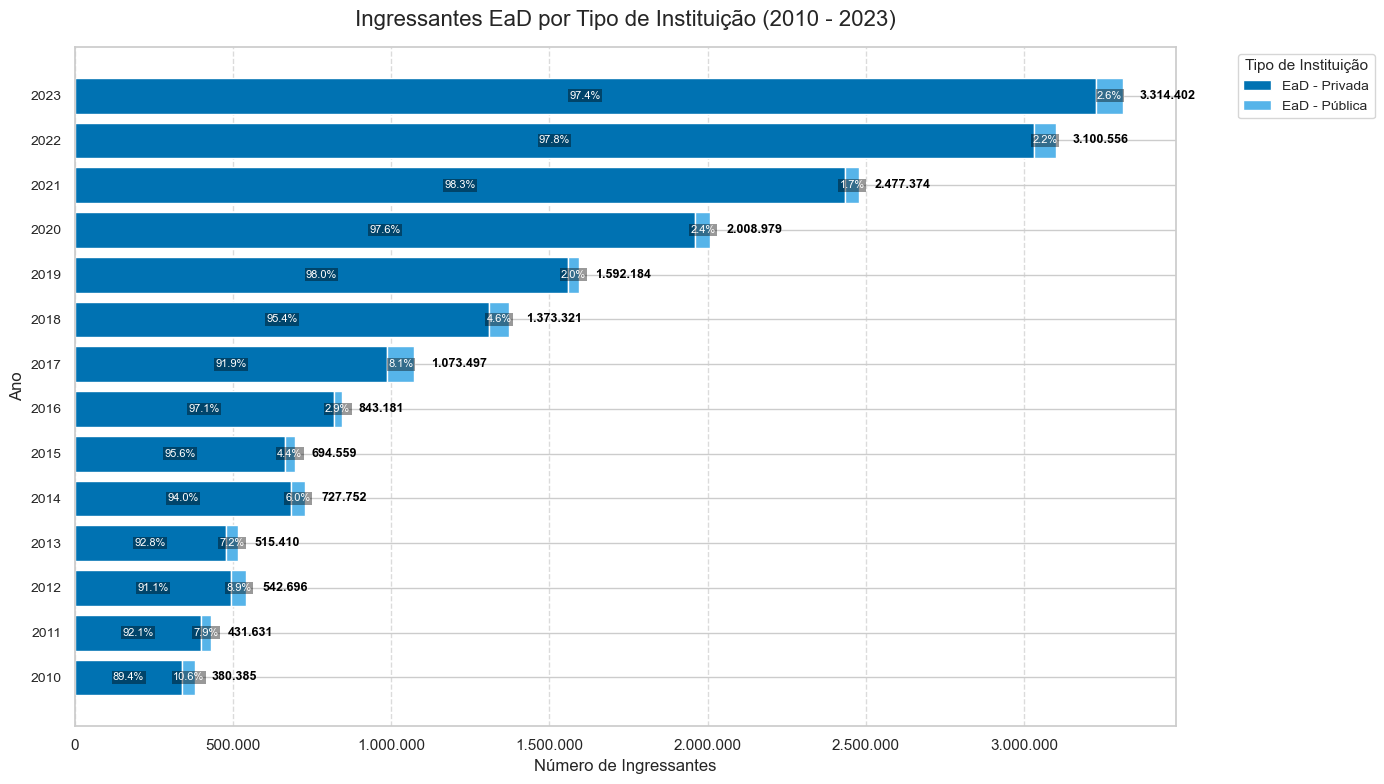

In [60]:
# Criação do gráfico de barras horizontais e empilhadas.

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")

anos_str = df_ead['Ano'].astype(str) # Converter anos para string para o eixo Y


# Plotando a primeira camada (EaD - Privada) 'Y' agora são os anos, 'width' é o valor

bars_ead_pr = plt.barh(
    anos_str,
    df_ead['EaD_pr'],
    label='EaD - Privada',
    color='#0072B2'
)

# Plotar a segunda camada (EaD - Pública) EMPILHADA sobre a primeira 'left' agora é a base da pilha no eixo X
bars_ead_pu = plt.barh(
    anos_str,
    df_ead['EaD_pu'],
    left=df_ead['EaD_pr'], # Base da pilha é o valor da camada anterior
    label='EaD - Pública',
    color='#56B4E9' # Cor para EaD Pública
)

# Adicionar rótulos (Total absoluto e Percentual)

# Rótulo para a parte "EaD - Privada" (base da pilha)
for i, bar in enumerate(bars_ead_pr):
    width =  bar.get_width() # largura da barra
    if width > 0:
        percentagem = df_ead['EaD_per_perc'].iloc[i]
        plt.text(bar.get_x() + width / 2, # centro X do segmento
                bar.get_y() + bar.get_height() / 2, # centro Y do segmento
                f'{percentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=8,
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Rótulo para a parte "EaD - Pública" (topo da pilha)
for i, bar in enumerate(bars_ead_pu):
    width = bar.get_width() # Largura da barra
    if width > 0:
        percentage = df_ead['EaD_pu_perc'].iloc[i]
        plt.text(bar.get_x() + width / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{percentage:.1f}%',
                ha='center', va='center', color='white', fontsize=8,
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Rótulo total absoluto (no final de cada pilha)
for i, ano_str in enumerate(anos_str):
    total_val = df_ead['Total_EaD'].iloc[i]
    plt.text(total_val + (plt.gca().get_xlim()[1] * 0.015),
             i, # Posição Y da barra (indice i)
             f"{int(total_val):n}", # Formato com ponto de milhar
             ha='left', va='center', fontsize=9, fontweight='bold', color='black')

plt.title('Ingressantes EaD por Tipo de Instituição (2010 - 2023)', fontsize=16, pad=15)
plt.ylabel('Ano', fontsize=12)
plt.xlabel('Número de Ingressantes', fontsize=12)

# Configuração ticks do eixo y para exibir todos os anos. Não precisa de rotação para os rótulos nas horizontais
plt.yticks(df_ead.index, anos_str, fontsize=10)

# Formatar o eixo X com separadores de milhar (ponto)
plt.ticklabel_format(style='plain', axis='x')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

plt.legend(title='Tipo de Instituição', fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade no eixo X
plt.savefig('Figura_7_Ing_EaD_por_Cat_Adm_bh.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [122]:
df_pres = df_i_cad[['Ano', 'Pres_pr', 'Pres_pu']].copy()

In [124]:
df_pres['Total_Presencial'] = df_pres['Pres_pr'] + df_pres['Pres_pu']

In [126]:
df_pres['Pres_Pr_Perc'] = (df_pres['Pres_pr'] / df_pres['Total_Presencial']) * 100

In [127]:
df_pres['Pres_Pu_Perc'] = (df_pres['Pres_pu'] / df_pres['Total_Presencial']) * 100

In [147]:
df_pres.columns

Index(['Ano', 'Pres_pr', 'Pres_pu', 'Total_Presencial', 'Pres_Pr_Perc',
       'Pres_Pu_Perc'],
      dtype='object')

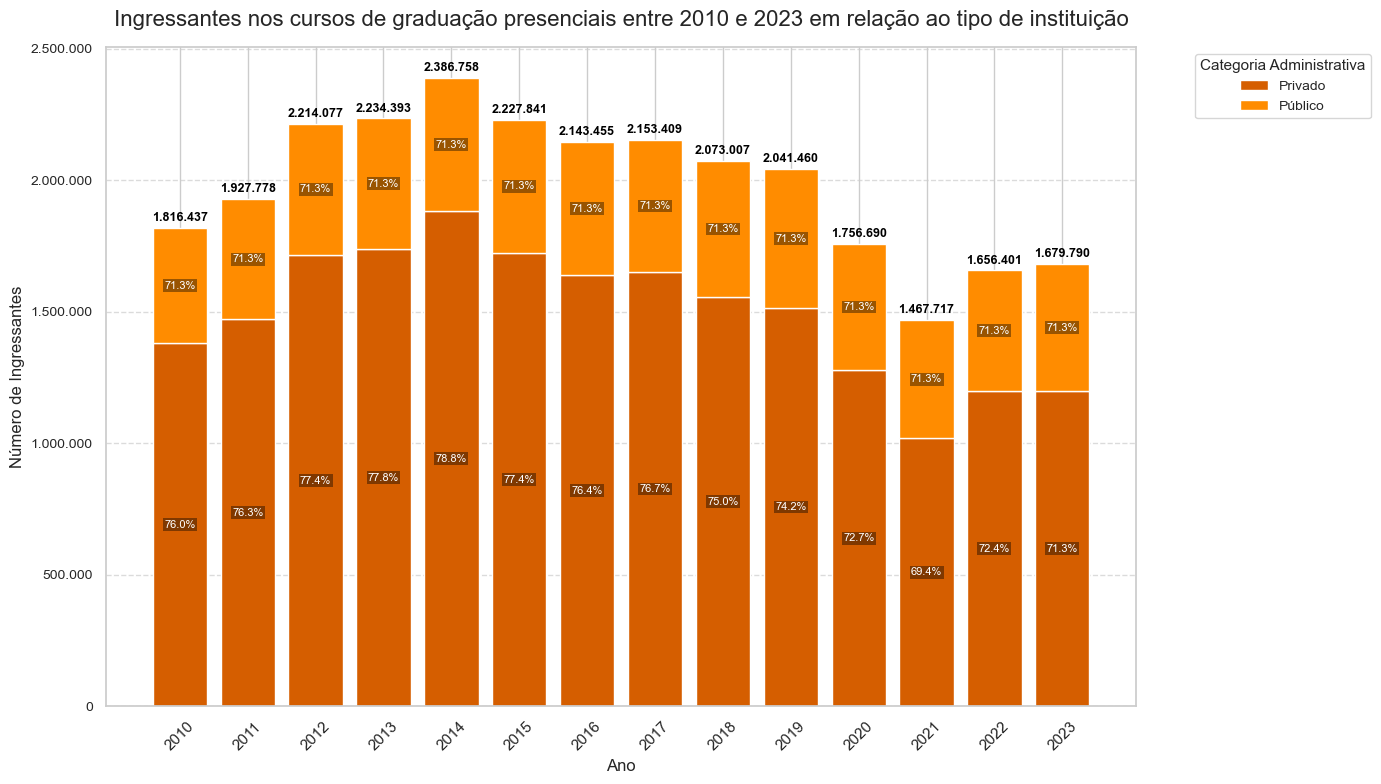

In [173]:
# Criando a imagem
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Convertendo anos para o eixo X

str_anos = df_pres['Ano'].astype(str)

# Plotando a primeira cada

bars_pres_pr = plt.bar(
    str_anos,
    df_pres['Pres_pr'],
    label='Privado',
    color='#D55E00'
)

bars_pres_pu = plt.bar(
    str_anos,
    df_pres['Pres_pu'],
    bottom=df_pres['Pres_pr'],
    label='Público',
    color='#FF8C00'
)

for i, bar in enumerate(bars_pres_pr):
    height = bar.get_height()
    if height > 0:
        percentage = df_pres['Pres_Pr_Perc'].iloc[i]
        plt.text(bar.get_x() + bar.get_width() / 2,
        bar.get_y() + height / 2, f'{percentage:.1f}%',
        ha='center', va='center', color='white', fontsize=8,
        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

for i, bar in enumerate(bars_pres_pu):
    height = bar.get_height()
    if height > 0:
        percentagem = df_pres['Pres_Pu_Perc'].iloc[i]
        plt.text(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height /2,
                f'{percentage:.1f}%',
                ha='center', va='center', fontsize=8, color='white',
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

for i, str_ano in enumerate(str_anos):
    total_val = df_pres['Total_Presencial'].iloc[i]
    plt.text(i, total_val + (plt.gca().get_ylim()[1] * 0.015),
            f'{int(total_val):n}',
            ha='center', va='center', fontsize=9, fontweight='bold', color='black')

plt.title('Ingressantes nos cursos de graduação presenciais entre 2010 e 2023 em relação ao tipo de instituição', fontsize=16, pad=15)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ingressantes', fontsize=12)

plt.xticks(rotation=45, ha='center')

# Formatar o eixo Y com separador de milhar (ponto)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))
plt.tick_params(axis='y', labelsize=10)

plt.legend(title='Categoria Administrativa', fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Figura_8_Ingressantes_Presenciais_Cat_Administrativa.png', dpi=300, bbox_inches='tight')
plt.show()